In [37]:
import numpy as np
import pandas as pd

path = r'C:\Users\ghoas\OneDrive\Desktop\excel sheets\naivebayes\spam.csv'
data = pd.read_csv(path)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:

#explore data
data.groupby('Category').describe()


Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [39]:
#new column spam divide the spam with normal mail 1 for spam

data['spam'] = data['Category'].apply(lambda x : 1 if x=='spam' else 0)
data.head() 

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
#split

from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Message, data.spam,test_size=0.2,random_state=42)

In [41]:
#explore dateset
#msg column is text convert to num

#USE COUNTVECTOR

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [42]:
X_train_vector = cv.fit_transform(X_train)

In [43]:
#get individual vector
print("Vector {}".format(cv.get_feature_names_out()))

Vector ['00' '000' '000pes' ... 'zyada' 'èn' 'ú1']


In [44]:
#comapre the transform vector with the cv
X_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
#train
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

In [46]:
NB.fit(X_train_vector,y_train)

MultinomialNB()

In [ ]:
text=["Hello I am just a texting for fun","Upto 20% discount on parking. Exclusive Offer"]

text_vector  = cv.transform(text)

NB.predict(text_vector)

#0 means not spam 1 is spam 

array([0, 1])

In [48]:
#score 
X_test_vector  = cv.transform(X_test)
NB.score(X_test_vector,y_test)

0.9919282511210762

In [49]:
#check confusion matrix

from sklearn.metrics import confusion_matrix
y_predicted  =NB.predict(X_test_vector)
cm = confusion_matrix(y_predicted,y_test)

<Axes: >

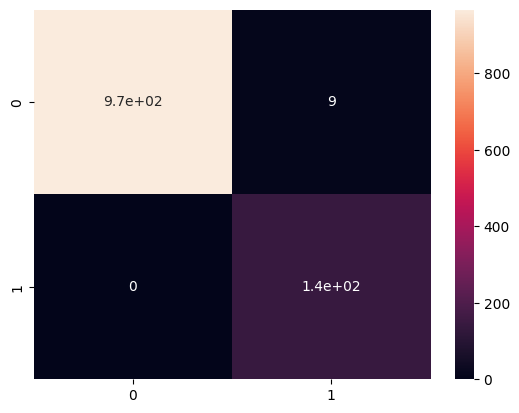

In [50]:
#plot 
import seaborn as sb
sb.heatmap(cm,annot=True)





















